# Measuring Convergence

In order to see whether our methods are working as designed, we need to be able to measure the convergence rate.  
We have $N$ points in our solution, so we need to define a metric that allows us to quantify the error.

We'll define a vector norm, the $L_2$ norm, for a set of discrete data $\phi_i$, as:

$$\|\phi\|_2 = \left ( \Delta x \sum_{i=0}^{N-1} \phi_i^2 \right )^{1/2}$$

and then we can define an error as $e_i = a_i - a^\mathrm{exact}(x_i)$ for all the points in our domain and compute an error, $\epsilon$ as $\| e\|_2$.  Further, for our problem, after 1 period, we know that the exact solution is just the initial data, so we can write:

$$\epsilon = \| a_i^\mathrm{final} - a_i^\mathrm{initial} \|_2
   = \left [ \Delta x \sum_{i=0}^{N-1} (a_i^\mathrm{final} - a_i^\mathrm{initial} )^2 \right ]^{1/2}$$
   

```{note}
It only makes sense to discuss convergence if the initial conditions themselves converge.  For the top hat, there is a discontinuity, and as we increase and increase the resolution, we will never resolve the step.  So the top hat is not a good set of initial conditions to assess convergence.  We should use a smooth problem.
```

We'll look at the Gaussian.

Our solver and the initial conditions are available in a module, `advection`

In [1]:
import advection

And here are our initial conditions

In [4]:
def sine(g):
    g.a[:] = 1.0 + 0.5 * np.sin(2.0*np.pi*g.x)

In [2]:
C = 0.5
u = 1.0
nx = 128

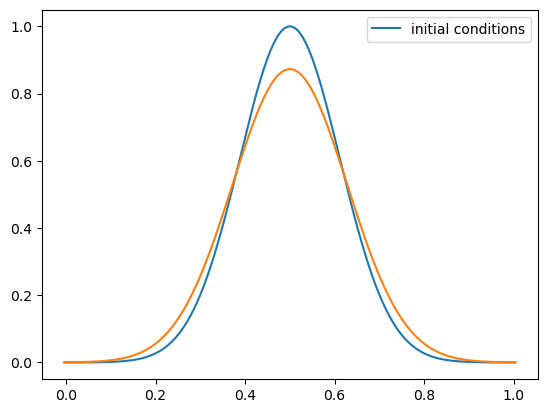

In [4]:
g = advection.advection(nx, u, C, init_cond=advection.gaussian)
fig = g.plot()

Our `FVGrid` class has a method to compute the norm

In [6]:
import inspect
print(inspect.getsource(g.norm))

    def norm(self, e):
        """ return the norm of quantity e which lives on the grid """
        if not len(e) == (2*self.ng + self.nx):
            return None

        return np.sqrt(self.dx*np.sum(e[self.ilo:self.ihi+1]**2))



Let's try this out

In [8]:
u = 1.0
C = 0.5

for nx in [32, 64, 128, 256, 512]:
    g = advection.advection(nx, u, C, init_cond=advection.gaussian)
    print(f"{nx:3d} {g.norm(g.a - g.ainit):7.4f}")

 32  0.1396
 64  0.0877
128  0.0506
256  0.0275
512  0.0144


As we see, this is demonstrating first-order convergence&mdash;as we double the number of cells, the error is decreasing by a almost a factor of 2.

```{admonition} Exercise

Try running the convergence test with the top hat initial conditions
```